In [1]:
import os; os.chdir("..")


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urbanstats.games.quiz_analysis import get_full_statistics, questions
from urbanstats.games.quiz import (
    display_question,
    stats_to_display,
    renamed,
    get_statistic_categories,
    compute_difficulty,
    ranges,
    entire_table,
    stats,
    full_shapefile,
    types,
)
from create_website import statistic_internal_to_display_name
from urbanstats.games.quiz_custom import custom_quiz_question

/home/kavi/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
from urbanstats.games.stategories import *

In [5]:
# full = full_shapefile()

In [6]:
stategory_table = compute_stategory_table()

In [7]:
# {t : len(v) for t, v in by_type.items()}

In [8]:
# {t : len(v) for t, v in by_type_filt.items()}

In [9]:
percentile_clip = 5

In [10]:
# masks.shape

In [23]:
rng = np.random.RandomState(0)
board = sample_stategory_board(rng)

0it [00:00, ?it/s]

Counter({'occupation': 48, 'industry': 40, 'race': 8, 'housing': 8, 'transportation': 8, 'main': 6, 'national_origin': 6, 'election': 6, 'education': 4, 'income': 2, 'weather': 2})


In [24]:
board

StategoryBoard(categories=array([34, 46]), geographies=array([[ 614,  300,  350,  211],
       [ 821,  756,  231, 1026]]), random_order=array([6, 1, 4, 7, 3, 5, 0, 2]))

In [27]:
board.replace_with_names()

(['transportation_means_car (Low)', 'mean_high_temp_4 (Low)'],
 array([['Boulder [Urban Area], CO, USA', 'Boulder city, Colorado, USA',
         'Boston [Urban Area], MA-NH, USA',
         'Columbia city, South Carolina, USA'],
        ['Utica-Rome MSA, NY, USA',
         'Portland-South Portland MSA, ME, USA',
         'Fargo city, North Dakota, USA', 'Kalispell MSA, MT, USA']],
       dtype=object))

In [30]:
board.render_board()

Fargo city, North Dakota, USA
Boulder city, Colorado, USA
Utica-Rome MSA, NY, USA
Kalispell MSA, MT, USA
Columbia city, South Carolina, USA
Portland-South Portland MSA, ME, USA
Boulder [Urban Area], CO, USA
Boston [Urban Area], MA-NH, USA


In [31]:
board.render_solution()

transportation_means_car (Low)
Boulder [Urban Area], CO, USA
Boulder city, Colorado, USA
Boston [Urban Area], MA-NH, USA
Columbia city, South Carolina, USA

mean_high_temp_4 (Low)
Utica-Rome MSA, NY, USA
Portland-South Portland MSA, ME, USA
Fargo city, North Dakota, USA
Kalispell MSA, MT, USA



In [253]:
geographies

array([[ 457, 1507,  412,  229],
       [1174,   94, 2207, 1179],
       [1817, 1558,  723, 1683],
       [2494, 2565,  850,  328]])

[('vacancy', 0),
 ('housing_per_pop', 1),
 ('household_income_under_50k', 1),
 ('mean_dist_Airport_updated', 1)]

In [147]:
mask_for_categories[mask_for_categories.sum(1) == 1]

array([], shape=(0, 2991), dtype=bool)

(array([  17.,   15.,   46.,   61.,   81.,  165.,  243.,  419.,  700.,
        1244.]),
 array([170. , 176.2, 182.4, 188.6, 194.8, 201. , 207.2, 213.4, 219.6,
        225.8, 232. ]),
 <BarContainer object of 10 artists>)

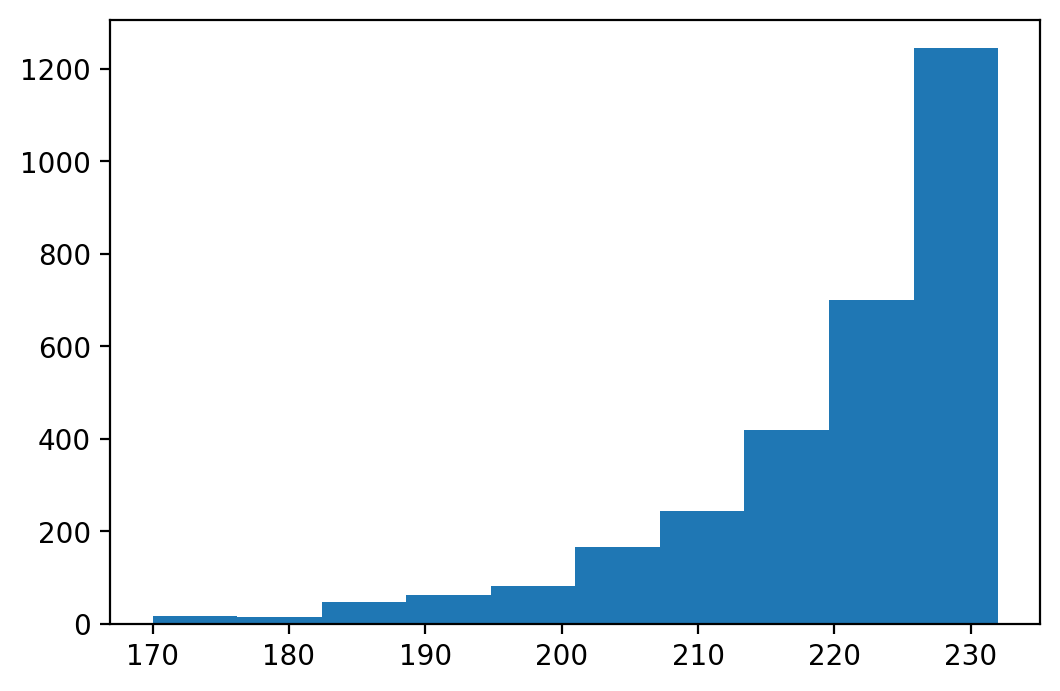

In [125]:
plt.figure(dpi=200)
plt.hist(masks.sum(0))

In [60]:
by_type["Urban Area"][by_type["Urban Area"].population > 5e4].sort_values("population")

,longname,shortname,population,hispanic,white,black,native,asian,hawaiian_pi,ad_0.25,...,"(insurance_coverage_none, overall_ordinal)","(insurance_coverage_govt, overall_ordinal)","(insurance_coverage_private, overall_ordinal)","(marriage_never_married, overall_ordinal)","(marriage_married_not_divorced, overall_ordinal)","(marriage_divorced, overall_ordinal)","(ad_0.25, overall_ordinal)","(ad_0.5, overall_ordinal)","(ad_2, overall_ordinal)","(ad_4, overall_ordinal)"
132157,"Walla Walla [Urban Area], WA-OR, USA",Walla Walla Urban Area,50013.0,0.229420,0.671046,0.018615,0.006578,0.016816,0.002499,2318.747087,...,67127,55721,98688,35015,126098,72294,28708,28479,32218,39370
133936,"Chambersburg [Urban Area], PA, USA",Chambersburg Urban Area,50094.0,0.148161,0.730067,0.063820,0.001797,0.013115,0.000419,1628.069095,...,69012,83725,75374,79093,76081,85384,47759,42061,45603,49364
133383,"Winder [Urban Area], GA, USA",Winder Urban Area,50189.0,0.133834,0.616769,0.169061,0.001455,0.034290,0.000199,1949.163653,...,21538,106619,102574,66610,96195,64150,37951,62086,61588,57416
132398,"Enid [Urban Area], OK, USA",Enid Urban Area,50194.0,0.162908,0.646651,0.030342,0.021198,0.012233,0.056640,1685.168177,...,11525,116555,114752,52406,115290,49832,45938,40718,40708,43688
133520,"Kingston [Urban Area], NY, USA",Kingston Urban Area,50254.0,0.126955,0.708103,0.077904,0.001492,0.023341,0.000159,1812.620340,...,80233,21796,126552,27566,136188,57447,41905,35806,40253,46881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132136,"Houston [Urban Area], TX, USA",Houston Urban Area,5853575.0,0.395229,0.288776,0.186992,0.001792,0.094733,0.000626,3685.362755,...,11558,136425,102128,38425,110363,113750,11666,13872,15100,14384
133212,"Miami-Fort Lauderdale [Urban Area], FL, USA",Miami-Fort Lauderdale Urban Area,6077522.0,0.458843,0.292196,0.185928,0.000984,0.026061,0.000258,4648.572944,...,21837,124691,90390,43124,123480,50977,7257,8141,8794,9063
133834,"Chicago [Urban Area], IL-IN, USA",Chicago Urban Area,8671746.0,0.242379,0.474525,0.174109,0.001079,0.075709,0.000202,4826.686064,...,71662,96868,64135,28286,122522,120848,6754,5653,6210,6075
131686,"Los Angeles-Long Beach-Anaheim [Urban Area], C...",Los Angeles-Long Beach-Anaheim Urban Area,12237376.0,0.463764,0.263499,0.062009,0.001756,0.169645,0.002225,6064.245714,...,61945,49965,106126,20567,132834,126669,4418,3907,3640,3568


In [30]:
for stat in stats:
    break

68904     7.101243e-01
68952     4.346019e-01
69064     5.030824e-02
68948     4.000416e-01
131212    8.411995e-02
              ...     
90672     0.000000e+00
3145      1.195088e-08
144608    8.964349e-09
90784     7.494866e-07
90877     9.993155e-07
Name: (population, percentile_by_population), Length: 167166, dtype: float64

In [5]:
tab = entire_table()

In [16]:
tab

,population,ad_1,sd,white,hispanic,black,asian,citizenship_citizen_by_birth,citizenship_citizen_by_naturalization,citizenship_not_citizen,...,occupation_sales_and_related_occupations,occupation_building_and_grounds_cleaning_and_maintenance_occupations,occupation_food_preparation_and_serving_related_occupations,occupation_healthcare_support_occupations,occupation_personal_care_and_service_occupations,"occupation_firefighting_and_prevention,_and_other_protective_service_workers_including_supervisors",occupation_law_enforcement_workers_including_supervisors,gpw_aw_density,gpw_population,gpw_pw_density_4
longname,,,,,,,,,,,,,,,,,,,,,
"New York city, New York, USA",8804167.0,19073.639631,10014.280124,0.308929,0.282860,0.201822,0.156005,0.637197,0.210746,0.152057,...,0.086392,0.041067,0.051170,0.063186,0.036103,0.018631,0.010101,NaN,NaN,NaN
"Los Angeles city, California, USA",3898338.0,5725.811739,3167.815099,0.288752,0.469449,0.082738,0.116596,0.637631,0.178639,0.183731,...,0.095235,0.051960,0.061578,0.038589,0.030740,0.012206,0.002764,NaN,NaN,NaN
"Chicago city, Illinois, USA",2744507.0,6850.228131,4575.469192,0.314306,0.298536,0.286889,0.069022,0.798249,0.096210,0.105541,...,0.091133,0.033929,0.054034,0.033829,0.029160,0.017528,0.012542,NaN,NaN,NaN
"Houston city, Texas, USA",2305349.0,2519.360580,1325.413792,0.236911,0.439824,0.221009,0.071679,0.709906,0.096404,0.193690,...,0.098559,0.051044,0.059166,0.027873,0.023596,0.012561,0.004833,NaN,NaN,NaN
"Phoenix city, Arizona, USA",1608183.0,2291.183724,1195.335131,0.417751,0.411365,0.073701,0.039795,0.807886,0.072722,0.119392,...,0.101413,0.052049,0.055713,0.029743,0.024248,0.012280,0.004866,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Beijing Shi, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1384.488113,23088322.0,11133.301758
"Florida [SN], USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.618702,21770260.0,1105.295654
"Minas Gerais, Brazil",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.643182,21483996.0,2295.105713


In [23]:
tab_domestic = tab[~np.isnan(tab.population)]

In [24]:
tab_domestic

,population,ad_1,sd,white,hispanic,black,asian,citizenship_citizen_by_birth,citizenship_citizen_by_naturalization,citizenship_not_citizen,...,occupation_sales_and_related_occupations,occupation_building_and_grounds_cleaning_and_maintenance_occupations,occupation_food_preparation_and_serving_related_occupations,occupation_healthcare_support_occupations,occupation_personal_care_and_service_occupations,"occupation_firefighting_and_prevention,_and_other_protective_service_workers_including_supervisors",occupation_law_enforcement_workers_including_supervisors,gpw_aw_density,gpw_population,gpw_pw_density_4
longname,,,,,,,,,,,,,,,,,,,,,
"New York city, New York, USA",8804167.0,19073.639631,10014.280124,0.308929,0.282860,0.201822,0.156005,0.637197,0.210746,0.152057,...,0.086392,0.041067,0.051170,0.063186,0.036103,0.018631,0.010101,NaN,NaN,NaN
"Los Angeles city, California, USA",3898338.0,5725.811739,3167.815099,0.288752,0.469449,0.082738,0.116596,0.637631,0.178639,0.183731,...,0.095235,0.051960,0.061578,0.038589,0.030740,0.012206,0.002764,NaN,NaN,NaN
"Chicago city, Illinois, USA",2744507.0,6850.228131,4575.469192,0.314306,0.298536,0.286889,0.069022,0.798249,0.096210,0.105541,...,0.091133,0.033929,0.054034,0.033829,0.029160,0.017528,0.012542,NaN,NaN,NaN
"Houston city, Texas, USA",2305349.0,2519.360580,1325.413792,0.236911,0.439824,0.221009,0.071679,0.709906,0.096404,0.193690,...,0.098559,0.051044,0.059166,0.027873,0.023596,0.012561,0.004833,NaN,NaN,NaN
"Phoenix city, Arizona, USA",1608183.0,2291.183724,1195.335131,0.417751,0.411365,0.073701,0.039795,0.807886,0.072722,0.119392,...,0.101413,0.052049,0.055713,0.029743,0.024248,0.012280,0.004866,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"3rd Circuit, USA",23281519.0,2284.083530,163.148887,0.642121,0.135579,0.117521,0.064085,0.864818,0.076279,0.058903,...,0.095187,0.032215,0.047185,0.033772,0.026051,0.011607,0.010462,NaN,NaN,NaN
"8th Circuit, USA",21690563.0,880.099492,17.136381,0.762819,0.065854,0.083116,0.029256,0.941172,0.028249,0.030580,...,0.095130,0.032802,0.052114,0.033554,0.025770,0.008040,0.008128,NaN,NaN,NaN
"10th Circuit, USA",18636944.0,1193.876748,12.836574,0.643797,0.197495,0.040144,0.026239,0.920301,0.034742,0.044956,...,0.096941,0.034002,0.053269,0.029685,0.026542,0.010884,0.008908,NaN,NaN,NaN
